In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_plot,pdp_isolate
from pdpbox.pdp import pdp_interact,pdp_interact_plot

In [2]:
df = pd.read_csv(r"C:\Users\navo1\Documents\Jupyter Notebooks\dash_Proj_2\notebooks\Project 2\New_York_City_Leading_Causes_of_Death.csv")

In [3]:
df

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2016,Essential Hypertension and Renal Diseases (I10...,Male,Other Race/ Ethnicity,NaN,NaN,NaN
1,2016,All Other Causes,Female,Non-Hispanic White,2416,172.4,102.4
2,2016,"Accidents Except Drug Poisoning (V01-X39, X43,...",Female,Non-Hispanic White,156,11.1,7.2
3,2016,All Other Causes,Male,Other Race/ Ethnicity,10,NaN,NaN
4,2016,"Intentional Self-Harm (Suicide: U03, X60-X84, ...",Male,Asian and Pacific Islander,32,5.4,5.4
5,2016,Diabetes Mellitus (E10-E14),Female,Non-Hispanic White,183,13.1,8
6,2016,Essential Hypertension and Renal Diseases (I10...,Female,Non-Hispanic White,219,15.6,8.2
7,2016,Diabetes Mellitus (E10-E14),Male,Hispanic,217,18,25.8
8,2016,Alzheimer's Disease (G30),Female,Non-Hispanic White,361,25.8,11.8
9,2016,All Other Causes,Male,Asian and Pacific Islander,449,75.6,85.1


In [4]:
# Lets look how many NaN
df.isna().sum()

Year                         0
Leading Cause                0
Sex                          0
Race Ethnicity               0
Deaths                      52
Death Rate                 109
Age Adjusted Death Rate    109
dtype: int64

In [5]:
df["Deaths"] = pd.to_numeric(df["Deaths"],errors='coerce')

In [6]:
df["Death Rate"] = pd.to_numeric(df["Death Rate"],errors='coerce')

In [7]:
df['Age Adjusted Death Rate'] = pd.to_numeric(df['Age Adjusted Death Rate'],errors='coerce')

In [8]:
df.dtypes

Year                         int64
Leading Cause               object
Sex                         object
Race Ethnicity              object
Deaths                     float64
Death Rate                 float64
Age Adjusted Death Rate    float64
dtype: object

In [9]:
# Lets fill NaN with means
df['Deaths'].fillna((df['Deaths'].mean()), inplace=True)
df['Death Rate'].fillna((df['Death Rate'].mean()), inplace=True)
df['Age Adjusted Death Rate'].fillna((df['Age Adjusted Death Rate'].mean()), inplace=True)

In [10]:
#Change M to Male and F to Female
df['Sex'] = df['Sex'].replace(['M'], 'Male')
df['Sex'] = df['Sex'].replace(['F'], 'Female')
df

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2016,Essential Hypertension and Renal Diseases (I10...,Male,Other Race/ Ethnicity,448.161345,53.548136,52.783616
1,2016,All Other Causes,Female,Non-Hispanic White,2416.000000,172.400000,102.400000
2,2016,"Accidents Except Drug Poisoning (V01-X39, X43,...",Female,Non-Hispanic White,156.000000,11.100000,7.200000
3,2016,All Other Causes,Male,Other Race/ Ethnicity,10.000000,53.548136,52.783616
4,2016,"Intentional Self-Harm (Suicide: U03, X60-X84, ...",Male,Asian and Pacific Islander,32.000000,5.400000,5.400000
5,2016,Diabetes Mellitus (E10-E14),Female,Non-Hispanic White,183.000000,13.100000,8.000000
6,2016,Essential Hypertension and Renal Diseases (I10...,Female,Non-Hispanic White,219.000000,15.600000,8.200000
7,2016,Diabetes Mellitus (E10-E14),Male,Hispanic,217.000000,18.000000,25.800000
8,2016,Alzheimer's Disease (G30),Female,Non-Hispanic White,361.000000,25.800000,11.800000
9,2016,All Other Causes,Male,Asian and Pacific Islander,449.000000,75.600000,85.100000


In [11]:
# List Unique Values 
df["Leading Cause"].unique()

array(['Essential Hypertension and Renal Diseases (I10, I12)',
       'All Other Causes',
       'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)',
       'Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)',
       'Diabetes Mellitus (E10-E14)', "Alzheimer's Disease (G30)",
       'Cerebrovascular Disease (Stroke: I60-I69)',
       'Influenza (Flu) and Pneumonia (J09-J18)',
       'Chronic Lower Respiratory Diseases (J40-J47)',
       'Diseases of Heart (I00-I09, I11, I13, I20-I51)',
       'Malignant Neoplasms (Cancer: C00-C97)',
       'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)',
       'Chronic Liver Disease and Cirrhosis (K70, K73-K74)',
       'Human Immunodeficiency Virus Disease (HIV: B20-B24)',
       'Peptic Ulcer (K25-K28)',
       'Assault (Homicide: U01-U02, Y87.1, X85-Y09)',
       'Mental and Behavioral Disorders due to Use of Alcohol (F10)',
       'Congenital Malf

In [12]:
#List unique values for Race Ethnicity
df["Race Ethnicity"].unique()

array(['Other Race/ Ethnicity', 'Non-Hispanic White',
       'Asian and Pacific Islander', 'Hispanic', 'Not Stated/Unknown',
       'Non-Hispanic Black', 'Black Non-Hispanic', 'White Non-Hispanic'],
      dtype=object)

In [13]:
df["Deaths"].unique()

array([4.48161345e+02, 2.41600000e+03, 1.56000000e+02, 1.00000000e+01,
       3.20000000e+01, 1.83000000e+02, 2.19000000e+02, 2.17000000e+02,
       3.61000000e+02, 4.49000000e+02, 4.04000000e+02, 4.50000000e+02,
       4.71000000e+02, 1.79000000e+02, 3.10200000e+03, 4.30600000e+03,
       3.85000000e+02, 2.90000000e+01, 3.90000000e+01, 4.30000000e+01,
       4.90000000e+01, 5.80000000e+01, 7.30000000e+01, 9.20000000e+01,
       1.18000000e+02, 5.30000000e+02, 4.05400000e+03, 3.09000000e+03,
       5.65000000e+02, 1.14700000e+03, 4.82000000e+02, 1.19000000e+02,
       5.90000000e+01, 9.00000000e+01, 2.30000000e+01, 1.31000000e+02,
       2.20000000e+01, 1.68000000e+02, 1.95000000e+02, 2.03000000e+02,
       2.04000000e+02, 2.31000000e+02, 4.61000000e+02, 1.91000000e+02,
       1.16200000e+03, 1.48500000e+03, 2.00000000e+01, 1.58000000e+02,
       1.40000000e+01, 1.60000000e+01, 1.70000000e+01, 1.80000000e+01,
       1.77000000e+02, 1.70000000e+02, 3.32000000e+02, 3.17000000e+02,
      

In [14]:
max = df.max()
print(max)
min = df.min()
print(min)

Year                                            2016
Leading Cause              Viral Hepatitis (B15-B19)
Sex                                             Male
Race Ethnicity                    White Non-Hispanic
Deaths                                          7050
Death Rate                                     491.4
Age Adjusted Death Rate                        350.7
dtype: object
Year                                                                    2007
Leading Cause              Accidents Except Drug Poisoning (V01-X39, X43,...
Sex                                                                   Female
Race Ethnicity                                    Asian and Pacific Islander
Deaths                                                                     5
Death Rate                                                               2.4
Age Adjusted Death Rate                                                  2.5
dtype: object


In [16]:
#Target- Sex 
#Train/Test/split random 80/20
#My target is the Sex so this a classification 
#Evaluation Metric: Validation Accuracy 

In [17]:
#Train/Val/Test Split
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df["Sex"], random_state=42)


In [18]:
target = 'Sex'

X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [19]:
# Make a y-train of the target
y_train.value_counts(normalize=True)

Female    0.505435
Male      0.494565
Name: Sex, dtype: float64

In [20]:
#Fit to a Random Forest Classfier 

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train);

In [21]:
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.7101449275362319

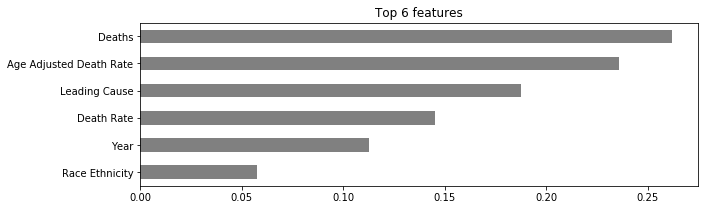

In [25]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 6
fig = plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');
fig.savefig('plot.png')

In [27]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [31]:
permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=2, 
    random_state=42
)

permuter.fit(X_test_transformed, y_test)
feature_names = X_test.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)


Weight,Feature
0.2337 ± 0.0399,Age Adjusted Death Rate
0.1250 ± 0.0254,Deaths
0.0217 ± 0.0000,Death Rate
-0.0054 ± 0.0036,Leading Cause
-0.0272 ± 0.0036,Race Ethnicity
-0.0507 ± 0.0145,Year
